In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sbn
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
plt.style.use('seaborn-v0_8-darkgrid')

#Importing dataset

In [4]:
assay = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\ASSAY.xlsx", sheet_name = 'ASSAY')
litologi = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\LITOLOGY.xlsx", sheet_name = 'LITOLOGI')
collar = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\COLLAR.xlsx", sheet_name = 'COLLAR')
survey = pd.read_excel(r"C:\Users\USER\Desktop\Data Nikel\Excel\SURVEY.xlsx", sheet_name = 'SURVEY') 

#Merging tables

In [5]:
df1= assay.merge(litologi, how = 'inner', on = ['BHID','DEPTH_FROM','DEPTH_TO'])
df1

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
0,DHP001,0.00,1.00,1.00,0.50,0.05,46.20,2.40,1.50,DHP001_1,1.00,WASTE
1,DHP001,1.00,2.00,1.00,0.72,0.05,44.40,2.60,1.60,DHP001_2,1.00,WASTE
2,DHP001,2.00,3.00,1.00,0.89,0.06,44.80,3.00,1.60,DHP001_3,1.00,WASTE
3,DHP001,3.00,4.00,1.00,0.98,0.07,45.40,2.70,1.30,DHP001_4,1.00,WASTE
4,DHP001,4.00,5.00,1.00,0.90,0.06,43.90,2.70,1.30,DHP001_5,1.00,WASTE
...,...,...,...,...,...,...,...,...,...,...,...,...
3200,DHP125,10.00,10.85,0.85,1.11,0.14,42.60,17.00,3.70,DHP125_10.85,0.85,WASTE
3201,DHP125,10.85,11.00,0.15,0.69,0.04,6.50,42.10,34.80,DHP125_11,0.15,BZ
3202,DHP125,11.00,12.00,1.00,0.95,0.06,8.22,40.26,33.58,DHP125_12,1.00,BZ
3203,DHP125,12.00,13.00,1.00,0.40,0.02,6.79,40.00,35.63,DHP125_13,1.00,BZ


In [6]:
df2= collar.merge(survey, how = 'inner', on = ['BHID','YCOLLAR','XCOLLAR','ZCOLLAR','DEPTH'])
df2

,BHID,YCOLLAR,XCOLLAR,ZCOLLAR,DEPTH,DH_TYPE,AZIMUTH,DIP
0,DHP001,9723049.46,334446.89,840.29,20.0,LINEAR,0,-90
1,DHP002,9723048.96,334348.91,848.37,29.0,LINEAR,0,-90
2,DHP003,9723048.93,334250.75,843.05,12.5,LINEAR,0,-90
3,DHP004,9723048.38,334148.37,833.78,27.5,LINEAR,0,-90
4,DHP005,9723051.23,334043.86,831.54,16.5,LINEAR,0,-90
...,...,...,...,...,...,...,...,...
120,DHP121,9722702.87,333800.90,835.09,27.0,LINEAR,0,-90
121,DHP122,9722701.09,333845.55,831.78,19.0,LINEAR,0,-90
122,DHP123,9722708.81,333894.31,838.32,15.5,LINEAR,0,-90
123,DHP124,9722701.46,333949.21,840.91,18.0,LINEAR,0,-90


#Are there outliers in the Ni result?

<Axes: >

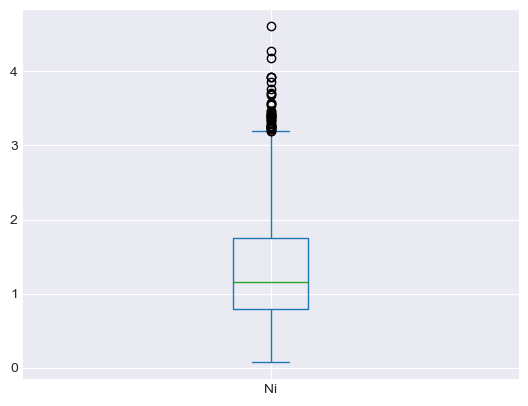

In [7]:
#Creating boxplot to detect outliers.
df1['Ni'].plot.box()

In [8]:
#Calculating the lower fence and upper fence.
q1 = np.percentile(df1.Ni, 25)
q3 = np.percentile(df1.Ni, 75)
iqr = q3 - q1
lf = (q1 - 1.5) * iqr
uf = (q3 + 1.5) * iqr
print(lf,uf)

-0.6816 3.12


#The company decides the outliers need to be investigated

In [27]:
#No outliers below the lower fence.
#Grouping samples with Ni > 3.12
outliers = df1.loc[df1['Ni'] > 3.12]
outliers

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
382,DHP016,16.0,17.00,1.00,3.34,0.02,10.70,39.40,24.50,DHP016_17,1.00,ORE
499,DHP020,16.0,16.35,0.35,3.33,0.03,12.90,34.10,17.60,DHP020_16.35,0.35,ORE
585,DHP023,11.0,12.00,1.00,3.22,0.09,17.00,32.90,22.00,DHP023_12,1.00,ORE
586,DHP023,12.0,12.75,0.75,3.47,0.11,17.30,29.30,19.20,DHP023_12.75,0.75,ORE
818,DHP032,7.0,8.00,1.00,4.28,0.18,12.90,34.10,23.20,DHP032_8,1.00,WASTE
...,...,...,...,...,...,...,...,...,...,...,...,...
3052,DHP118,18.0,19.00,1.00,3.43,0.09,13.77,47.67,18.13,DHP118_19,1.00,ORE
3053,DHP118,19.0,20.00,1.00,3.40,0.18,18.90,37.20,15.40,DHP118_20,1.00,ORE
3160,DHP123,9.0,10.00,1.00,3.40,0.09,35.30,17.20,10.70,DHP123_10,1.00,ORE
3161,DHP123,10.0,11.00,1.00,3.92,0.09,28.97,23.47,15.04,DHP123_11,1.00,ORE


#Are there samples that were taken less than the required interval?

In [22]:
#Locating improper samples (samples whom taken from less than 1m interval).
improper_samples = df1.loc[df1['INTERVAL'] < 1]
improper_samples

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
14,DHP001,14.00,14.75,0.75,1.74,0.08,19.70,31.70,16.50,DHP001_14.75,0.75,ORE
15,DHP001,14.75,15.00,0.25,1.03,0.01,6.50,38.50,29.20,DHP001_15,0.25,ORE
18,DHP001,17.00,17.40,0.40,0.63,0.01,5.83,38.36,29.94,DHP001_17.4,0.40,BZ
19,DHP001,17.40,18.00,0.60,0.69,0.00,5.40,42.70,23.47,DHP001_18,0.60,BZ
33,DHP002,11.00,11.45,0.45,1.88,0.01,7.33,27.91,17.54,DHP002_11.45,0.45,ORE
...,...,...,...,...,...,...,...,...,...,...,...,...
3184,DHP124,13.42,14.00,0.58,1.51,0.01,6.96,41.45,31.63,DHP124_14,0.58,ORE
3185,DHP124,14.00,14.40,0.40,1.16,0.01,6.40,42.20,35.40,DHP124_14.4,0.40,ORE
3186,DHP124,14.40,15.00,0.60,2.78,0.04,15.70,38.20,19.90,DHP124_15,0.60,ORE
3200,DHP125,10.00,10.85,0.85,1.11,0.14,42.60,17.00,3.70,DHP125_10.85,0.85,WASTE


#Company decides improper samples that are in the outliers will be sent back to lab

In [31]:
#Cross correlating outliers with improper samples.
onmerge = ['BHID','DEPTH_FROM', 'DEPTH_TO', 'INTERVAL', 'Ni', 'Co', 'Fe',
           'SiO2', 'MgO', 'SAMID', 'THICKNESS', 'LIT']
resend = outliers.merge(improper_samples, how = 'inner', on = onmerge)
resend

,BHID,DEPTH_FROM,DEPTH_TO,INTERVAL,Ni,Co,Fe,SiO2,MgO,SAMID,THICKNESS,LIT
0,DHP020,16.00,16.35,0.35,3.33,0.03,12.90,34.10,17.60,DHP020_16.35,0.35,ORE
1,DHP023,12.00,12.75,0.75,3.47,0.11,17.30,29.30,19.20,DHP023_12.75,0.75,ORE
2,DHP033,22.00,22.50,0.50,3.57,0.52,31.20,14.80,7.60,DHP033_22.5,0.50,ORE
3,DHP033,24.00,24.40,0.40,3.71,0.12,11.70,37.20,27.30,DHP033_24.4,0.40,ORE
4,DHP033,24.40,24.60,0.20,3.37,0.10,8.30,37.00,25.30,DHP033_24.6,0.20,ORE
5,DHP033,24.60,25.00,0.40,3.93,0.22,17.40,33.20,20.00,DHP033_25,0.40,ORE
6,DHP036,8.50,9.00,0.50,3.36,0.07,13.50,35.80,26.10,DHP036_9,0.50,ORE
7,DHP036,10.00,10.80,0.80,3.24,0.08,12.80,34.50,22.60,DHP036_10.8,0.80,ORE
8,DHP036,10.80,11.00,0.20,3.68,0.19,18.70,33.30,13.20,DHP036_11,0.20,ORE
9,DHP041,26.38,27.00,0.62,3.20,0.14,10.33,37.41,27.40,DHP041_27,0.62,ORE


In [34]:
#Name of samples that will undergo another lab analysis.
print(resend['SAMID'])

0     DHP020_16.35
1     DHP023_12.75
2      DHP033_22.5
3      DHP033_24.4
4      DHP033_24.6
5        DHP033_25
6         DHP036_9
7      DHP036_10.8
8        DHP036_11
9        DHP041_27
10    DHP052_14.35
11    DHP052_14.61
12       DHP052_15
13       DHP052_25
14    DHP068_16.71
15    DHP075_13.35
16       DHP075_14
17    DHP075_14.75
18       DHP088_20
19       DHP095_11
Name: SAMID, dtype: object


In [39]:
#Count of samples need to be taken into investigation.
resend['SAMID'].count()

20